In [1]:
%matplotlib inline
# This is a way to make the scatter plot show up inside the jupyter notebook

In [33]:
import pandas as pd
import glob

#isolate the proper column in each
a = glob.glob('*.csv')
#join rows together 
titles = []

dfs =[]
for i in a:
    df = pd.read_csv(i, header=None, names=["title", "date"])
    print(i, df)
    dfs.append(df)

465.csv                                                 title  date
0          Gray Friar and the Black Spirit of the Wye  1810
1   Houses of Osma and Almeria; or, Convent of St....  1810
2                                  Italian Maurauders  1810
3                           Love, Mystery, and Misery  1810
4                          Mysteries of Ferney Castle  1810
5                             Mysteries of the Forest  1810
6      Nocturnal Minstrel: or, the spirit of the wood  1810
7            Prison of Montabaun: or, times of terror  1810
8                   ruins of the abbey of fitz-martin  1810
9                                     scottish chiefs  1810
10                Sir Francis Darrell: or, the vortex  1810
11          Suffolk tale: or, the perfidious guardian  1810
12                     torbolton abbey: a gothic tale  1810
13                                          zastrozzi  1810
14  Italian banditti: or, the secret of henry and ...  1811
15                  montalva: or

In [40]:
main_frame = dfs[0]
for i in range(len(dfs)):
    if i > 0:
        main_frame = main_frame.append(dfs[i], ignore_index=True)
        
print(len(main_frame))

277


In [50]:
titles = main_frame['title']
token_list = []
for t in titles:
    tokens = t.lower().split(" ")
    token_list.append(tokens)

In [52]:
token_len = [len(i) for i in token_list]
main_frame['token_len'] = token_len

In [53]:
main_frame

,title,date,token_len
0,Gray Friar and the Black Spirit of the Wye,1810.0,9
1,"Houses of Osma and Almeria; or, Convent of St....",1810.0,10
2,Italian Maurauders,1810.0,2
3,"Love, Mystery, and Misery",1810.0,4
4,Mysteries of Ferney Castle,1810.0,4
5,Mysteries of the Forest,1810.0,4
6,"Nocturnal Minstrel: or, the spirit of the wood",1810.0,8
7,"Prison of Montabaun: or, times of terror",1810.0,7
8,ruins of the abbey of fitz-martin,1810.0,6
9,scottish chiefs,1810.0,2


In [58]:
final = main_frame['token_len'].groupby(main_frame['date']).mean()
final

date
1799.0    5.142857
1800.0    4.960000
1801.0    5.714286
1802.0    5.173913
1803.0    6.538462
1805.0    5.315789
1806.0    5.600000
1807.0    5.500000
1809.0    6.000000
1810.0    5.285714
1811.0    5.400000
1814.0    6.000000
1815.0    5.000000
1816.0    4.125000
1817.0    6.400000
1818.0    4.875000
1819.0    4.000000
1820.0    5.250000
1821.0    4.333333
1822.0    5.500000
1823.0    2.333333
1824.0    4.200000
1825.0    4.500000
1826.0    7.250000
1827.0    4.000000
1828.0    6.000000
1830.0    5.750000
1831.0    3.000000
1832.0    4.333333
1835.0    1.000000
1912.0    4.000000
Name: token_len, dtype: float64

In [59]:
type(final)

pandas.core.series.Series

In [64]:
final_frame = final.to_frame()

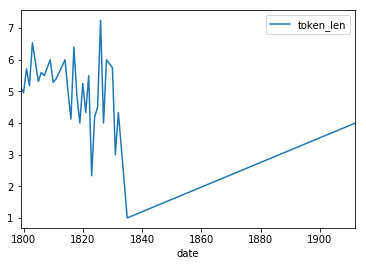

In [66]:
final_frame.plot()

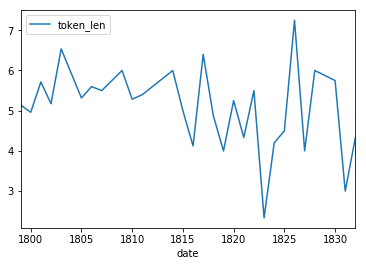

In [73]:
f = final_frame.drop([1835.0,1912.0])
f.plot()
